<div align="center">
  <h2> Méthodes quantitatives en neurosciences </h2>
</div>

<div align="center">
<b><i> Cours NSC-2006, année 2015</i></b><br>
<b>Laboratoire d'introduction au traitement des signaux</b><br>
     *Pierre Bellec, Yassine Ben Haj Ali*
</div>

### Contexte: *Perception visuelle et traitement du signal*

Le but de ce labo c'est de se familiariser avec le traitement d'un signal en utilisant la methaude de convolution. Cette methode peut se penser comme une opération qui remplace chaque point du signal (analogique ou numerique) par une moyenne pondérée des points voisins, avec des poids defini par noyeau.

En premier lieu nous allons appliquer différents noyaux de convolution à des signaux à une dimension (décours temporel), ensuite nous allons appliquer ces noyaux à des signaux à deux dimensions (image)  

Ne pas tenir compte de cette partie du code:

In [8]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.Octave started and connected!
The pymatbridge extension is already loaded. To reload it, use:
  %reload_ext pymatbridge


### Section 1 : Convolution d'un signal à une dimention

### Section 2 : Convolution d'un signal à deux dimention

 ### I. Convolution à Moyenne mobile

En premiers lieu, il faut charger l'image "`lena.png`" dans la variable  `img` à l'aide de la fonction `imread()`:

In [27]:
%%matlab
img = imread ('lena.png');

La fonction `imagesc()` nous permet de visualiser une image binaire comme suit:

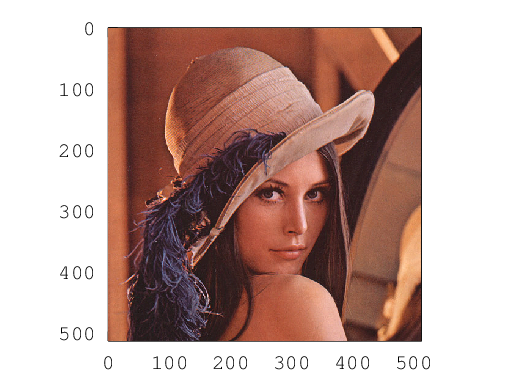

In [28]:
%%matlab
image(img)

__1. Quelle est la taille de la matrice `img` ? Et combiens de dimentions a-t-elle?__

In [29]:
%%matlab
size(img)

ans =

   512   512     3



À fin de faciliter le travail, Nous allons reduire cette image à seulement deux dimentions. Nous allons éliminer la dimention 3, celle qui gére la couleur de chaque pixel. Pour cela nous allons faire la somme de cette troisiemme dimention et ensuite enregistrer la nouvelle image et l'afficher à nouveau:

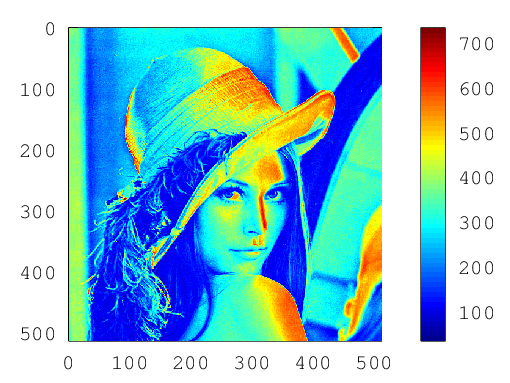

In [30]:
%%matlab
img = sum(img,3);
imagesc(img)
colormap jet, colorbar 

Nous allons appliquer une serie de convolutions sur l'image. Nous allons generer different noyaux (Kernel) qu'on va appliquer à cette image.

__Noyau à moyenne mobile__

Nous allons construire un noyau equilibré qu'on va faire convoluer dans l'image. On va commencer par construire une matrice ```ker1``` de taille 5 par 5. Ensuite on donnera le même poids (une valeur de 1) à chaqu'une des cellules du noyau.

In [31]:
%%matlab
ker1 = ones(5,5);
ker1 = ker1/sum(sum(abs(ker1)));
ker1

ker1 =

   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000



Appliquant la convolution avec la fonction ```conv2``` et visualisant les images ```img``` et ```img1```.

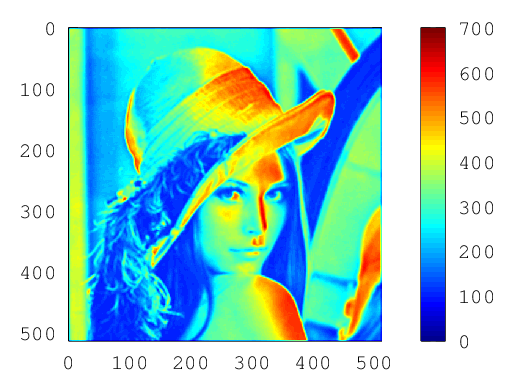

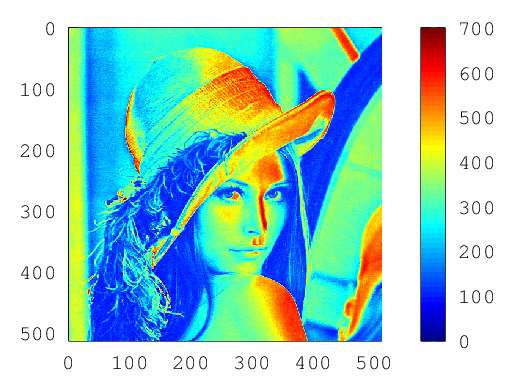

In [32]:
%%matlab
img1 = conv2(img,ker1,'same');
imagesc(img1,[0 700]); colormap jet; colorbar
figure
imagesc(img,[0 700]); colormap jet; colorbar

__2. Appliquez un noyau plus grand ker2 de taille 20x20 et visualisez l'image img2 convolué__

*reponse*

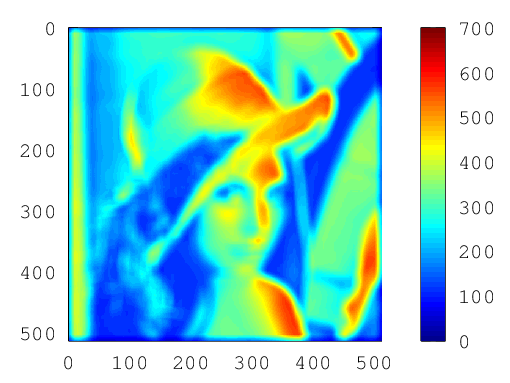

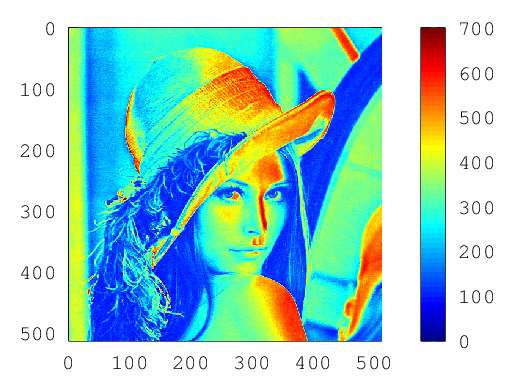

In [33]:
%%matlab
ker2 = ones(20,20);
ker2 = ker2/sum(sum(abs(ker2)));
img2 = conv2(img,ker2,'same');
imagesc(img2,[0 700]); colormap jet; colorbar
figure
imagesc(img,[0 700]); colormap jet; colorbar

Maintenant nous allons appliquer un noyau avec des __pondérations non equilibrées__ entre les cellules.

__3. Construisez un nouveau noyau ```ker3``` qui a les dimention et les valeurs suivantes:__

```octave
ker3 =

  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1
  
``` 

*reponse*:

In [34]:
%%matlab
ker3 = [ -ones(5,2) zeros(5,1) ones(5,2) ]

ker3 =

  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1
  -1  -1   0   1   1



__4. Appliquez la convolution sur l'image avec le nouveau noyau ```ker3``` et enregistrez la nouvelle image convolué dans la variable ```img3```, et visualisez cett derniére aprés convolution__

*Réponse*:

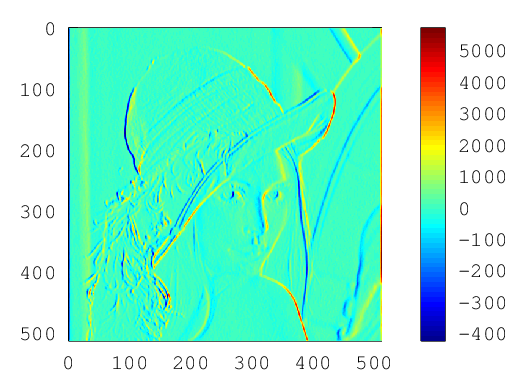

In [26]:
%%matlab
img3 = conv2(img,ker3,'same');
imagesc(img3); colormap jet; colorbar

__5. Qu'est ce qui est mit en relief dans l'image en haut par ce type de noyau ?__

__6. Construisez un nouveau noyau ```ker4``` qui detecte les bords horizontaux dans l'image, ensuite appliquez la convolution avec ce nouveau noyau et enregister la nouvelle image sous la variable ```img4```, et enfin visualisez ```img3 et img4```__

*réponse*:

ker4 =

  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1
   0   0   0   0   0
   1   1   1   1   1
   1   1   1   1   1



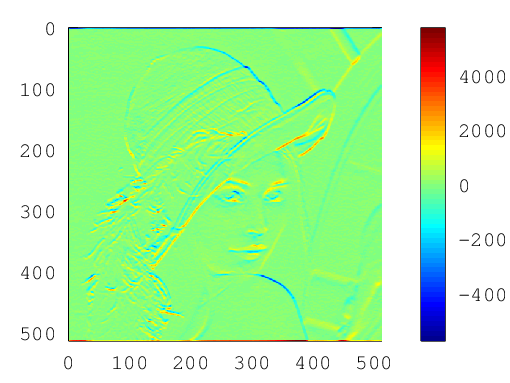

In [38]:
%%matlab
ker4 = ker3'
img4 = conv2(img,ker4,'same');
imagesc(img4); colormap jet; colorbar

Voici un exemple de noyau avec __pondérations non equilibrées__ plus complexe que les deux precedantes.

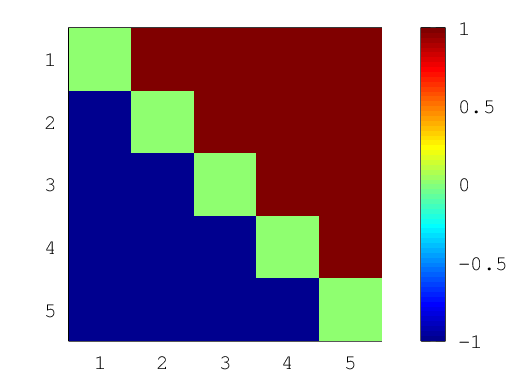

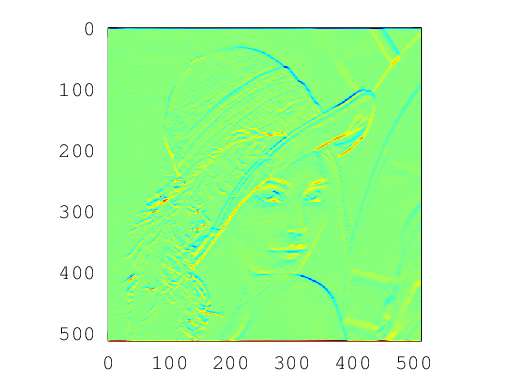

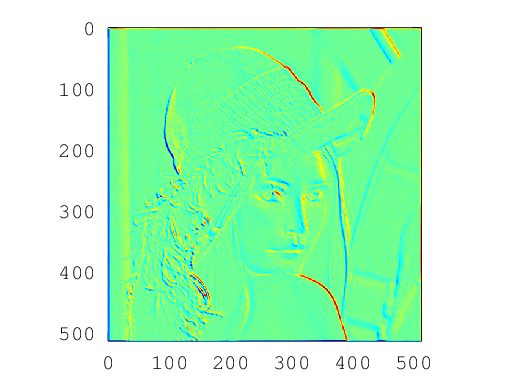

In [40]:
%%matlab
ker5 = tril(-ones(size(ker4))) + triu(ones(size(ker4)));
img5 = conv2(img,ker5,'same');
imagesc(ker5); colormap jet; colorbar
figure
imagesc(img4); colormap jet
figure
imagesc(img5); colormap jet

In [ ]:
%%matlab
